
Impact of physics parameters
--------------------------------------------------------------



In [1]:
# Standard tools

import os, sys 
import numpy as np
import scipy
from copy import deepcopy
import pickle
import CBcm

In [2]:
# Plotting tools
import matplotlib.pyplot as plt

In [3]:
sys.path.append('/home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules')
import mufit_fast_plots2 as mfp
outdir = '/home/jp/projects/atm_nu/ddm_results/physics_impact'

MUFIT: Using quickflux2!
MUFIT: Using quickflux2!


In [15]:
settings_file = '/home/jp/projects/atm_nu/ddm_results/final_settings/common_settings_daemon.pkl'
settings = pickle.load(open(settings_file, 'rb'))

In [6]:
def get_vlist(target, plist):
    vlist = []
    for onep in plist:
        parameter = settings['zfactors_labeled'][onep]
        value = parameter[0]
        error = parameter[1]
        scale = target/(error/value)
        vlist.append(scale)
    return vlist

In [18]:
1./(settings['zfactors_labeled']['pi+_158G'][1]/settings['zfactors_labeled']['pi+_158G'][0])

5.965123315534551

In [6]:
def get_colors(plist):
    clist = []
    for onep in plist:
        clist.append(settings['hadron_colors1'][onep])
    return clist

In [7]:
settings['hadron_colors1']

{u'K+_158G': u'C2',
 u'K+_2P': u'C1',
 u'K+_31G': u'C0',
 u'K-_158G': u'C2',
 u'K-_2P': u'C1',
 u'K-_31G': u'C0',
 u'n_158G': u'C4',
 u'n_2P': u'C3',
 u'p_158G': u'C2',
 u'p_2P': u'C1',
 u'pi+_158G': u'C2',
 u'pi+_20T': u'C6',
 u'pi+_2P': u'C1',
 u'pi+_31G': u'C0',
 u'pi-_158G': u'C2',
 u'pi-_20T': u'C6',
 u'pi-_2P': u'C1',
 u'pi-_31G': u'C0'}

In [8]:
reload(mfp)

MUFIT: Using quickflux2!


<module 'mufit_fast_plots2' from '/home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules/mufit_fast_plots2.pyc'>

In [9]:
import CBcm

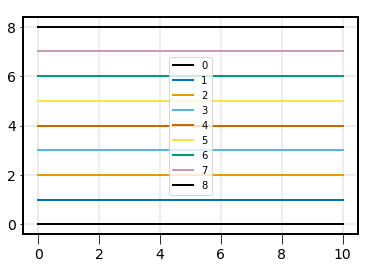

In [10]:
for i in range(0,9):
    plt.plot([0, 10],[i, i], label= '%i' % i)
plt.legend(loc=0)

## Playground over

In [79]:
reload(mfp)

MUFIT: Using quickflux2!


<module 'mufit_fast_plots2' from '/home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules/mufit_fast_plots2.pyc'>

Using quickflux2!
/home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules/resources/daemonsplines_20230207_nousertab.pkl
Excluded params removed from known_params.
No calibration file for daemon-v3
Adjusting DEIS name
daemon-v3


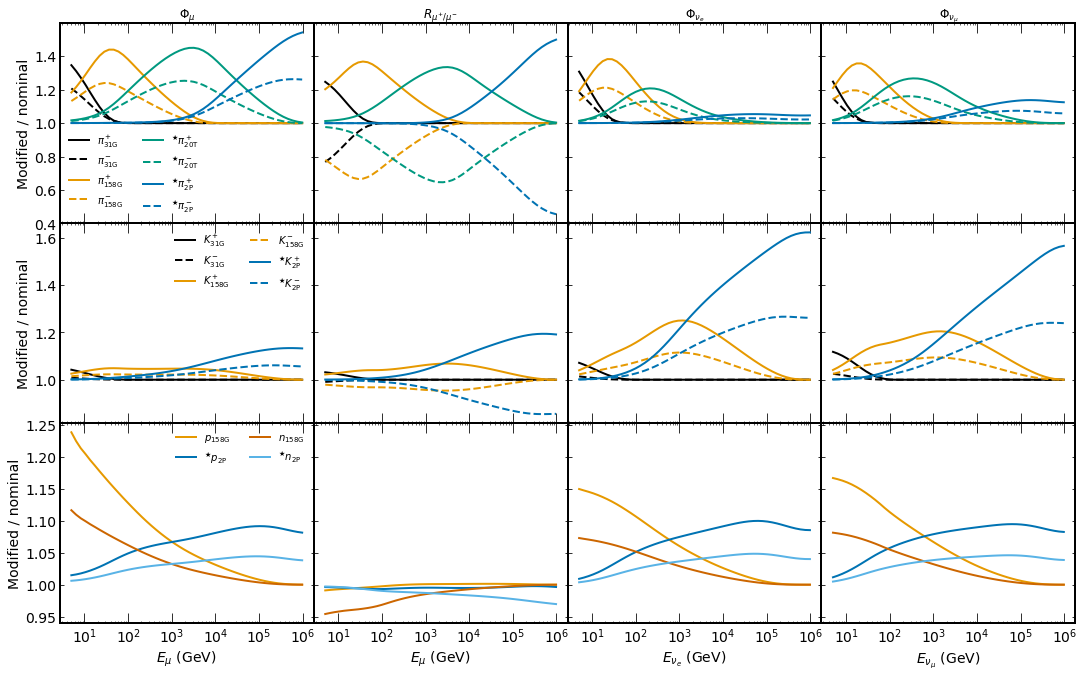

In [11]:
plist = ['pi+_31G',
              'pi-_31G',
              'pi+_158G',
              'pi-_158G',
              'pi+_20T',
              'pi-_20T',
              'pi+_2P',
              'pi-_2P',
         
              'K+_31G',
              'K-_31G',
              'K+_158G',
              'K-_158G',
              'K+_2P',
              'K-_2P',         
         
              'p_158G',
              'p_2P',
              'n_158G',
              'n_2P',]
f = mfp.plotPhysImpactGrid(flux_splines = 'daemon-v3',
                   param_list=plist,
                   value_list = get_vlist(1, plist),
                   color_list = get_colors(plist),
                           figsize=np.array([16,10])*0.95,#,6),
                   labelid = settings['param_legend'],
                   ncol=2,
                   use_quickflux2 = True,
                  )
f.savefig(os.path.join(outdir, 'impact_grid_daemon4.pdf'))
f.savefig(os.path.join(outdir, 'impact_grid_daemon4.png'),dpi=300)

[-33.65885480354943, -12.233962035542085, -5.965123315534551, -33.73192408705193, -5.965142693271685, -33.72794934037696, -5.965142696415504, -33.727949586774656]
Using quickflux2!
/home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules/resources/daemonsplines_20230207_nousertab.pkl
Excluded params removed from known_params.
No calibration file for daemon-v3
Adjusting DEIS name
daemon-v3


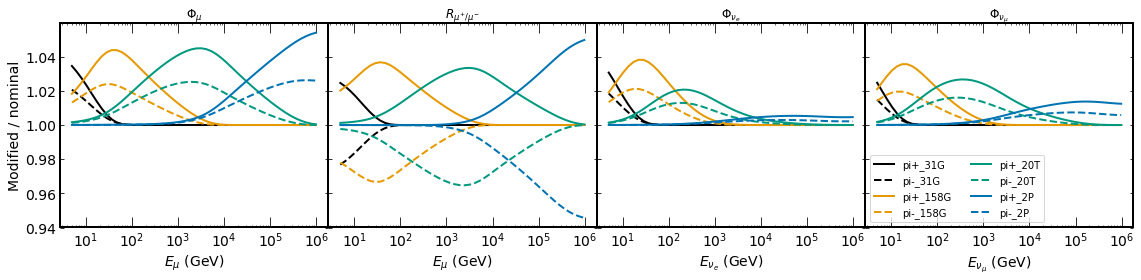

In [81]:
plist = ['pi+_31G',
              'pi-_31G',
              'pi+_158G',
              'pi-_158G',
              'pi+_20T',
              'pi-_20T',
              'pi+_2P',
              'pi-_2P']
print(get_vlist(-1., plist))
f = mfp.plotPhysImpact(flux_splines = 'daemon-v3',
                   param_list=plist,
                   value_list = get_vlist(0.1, plist),
                   color_list = get_colors(plist),
                    single_line=True,
                       legend_box = 3,
                       ncol=2,
                       use_quickflux2 = True,
                  )
#f.savefig(os.path.join(outdir, 'impact_pions_s3.pdf'))
#f.savefig(os.path.join(outdir, 'impact_pions_s3.png'),dpi=300)

Using quickflux2!
/home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules/resources/daemonsplines_20230207_nousertab.pkl
Excluded params removed from known_params.
No calibration file for daemon-v3
Adjusting DEIS name
daemon-v3


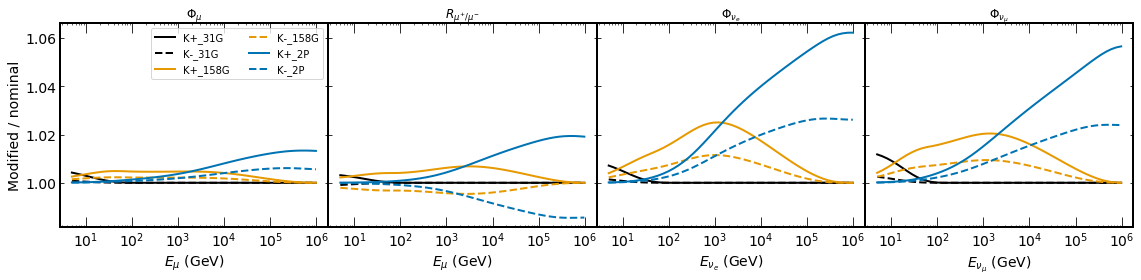

In [83]:
plist=[              'K+_31G',
              'K-_31G',
              'K+_158G',
              'K-_158G',
              'K+_2P',
              'K-_2P',]
f = mfp.plotPhysImpact(flux_splines = 'daemon-v3',
                   param_list=plist,
                   value_list = get_vlist(0.1, plist),
                   color_list = get_colors(plist),
                    single_line=True,
                       legend_box = 0,
                       ncol=2,
                       use_quickflux2=True
                  )
f.savefig(os.path.join(outdir, 'impact_kaons_s3.pdf'))
f.savefig(os.path.join(outdir, 'impact_kaons_s3.png'),dpi=300)


MUFIT: Using quickflux2!
('Using MCEq jacobians:\n ', 'daemonsplines_20230207_nousertab.pkl')
Opening in V7+ format
Adjusting DEIS name
daemon-v3


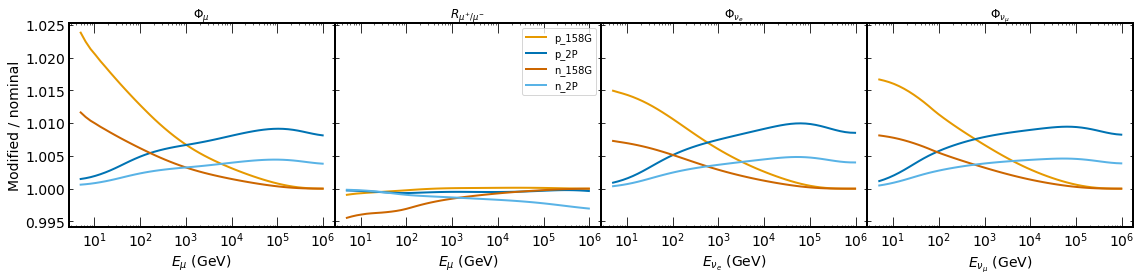

In [84]:
reload(mfp)
plist=[ 'p_158G',
              'p_2P',
              'n_158G',
              'n_2P']
f = mfp.plotPhysImpact(flux_splines = 'daemon-v3',
                   param_list=plist,
                   value_list = get_vlist(0.1, plist),
                   color_list = get_colors(plist),
                    single_line=True,
                       legend_box = 1,
                       ncol=1,
                  )
f.savefig(os.path.join(outdir, 'impact_baryons_s3.pdf'))
f.savefig(os.path.join(outdir, 'impact_baryons_s3.png'),dpi=300)

('Using MCEq jacobians:\n ', 'daemonsplines_20230207_nousertab.pkl')
Opening in V7+ format
Adjusting DEIS name
daemon-v3


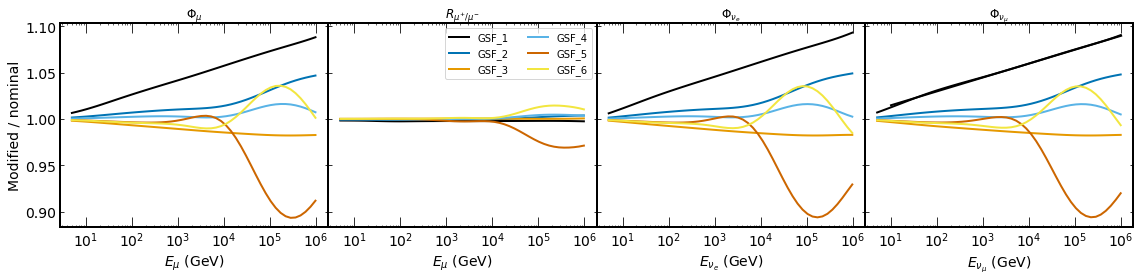

In [85]:
f = mfp.plotPhysImpact(flux_splines = 'daemon-v3',
                   param_list=['GSF_1','GSF_2','GSF_3','GSF_4','GSF_5', 'GSF_6'],
                   value_list = [1]*6,#-1., 0.5, 4., 4., 0.5, 0.5]
                    single_line=True,
                       legend_box = 1,
                       ncol=2,
                  )
egrid = np.logspace(1, 6, 21)
plt.plot(egrid, 1+0.015*np.log10(egrid), color='k')
#f.savefig(os.path.join(outdir, 'impact_gsf.pdf'))
#f.savefig(os.path.join(outdir, 'impact_gsf.png'),dpi=300)

In [12]:
reload(mfp)

MUFIT: Using quickflux2!


<module 'mufit_fast_plots2' from '/home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules/mufit_fast_plots2.pyc'>

In [7]:
plist = ['pi+_158G', 'pi+_20T', 'K+_2P']
get_vlist(1,plist)

[5.965123315534551, 5.965142693271685, 19.262279924790576]

MUFIT: Using quickflux2!
('Using MCEq jacobians:\n ', 'daemonsplines_20230207_nousertab.pkl')
Opening in V7+ format
Adjusting DEIS name
daemon-v3


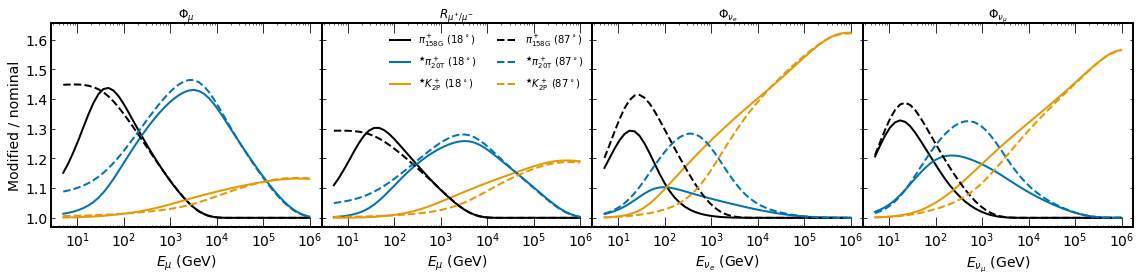

In [13]:
reload(mfp)
plist = ['pi+_158G', 'pi+_20T', 'K+_2P']
        #'he_pi+','vhe1_pi+', 'vhe3_K+']
f = mfp.plotPhysImpactAngle(flux_splines = 'daemon-v3',
                            param_list=plist,
                            angles = [ 18.1949 , 87.1340],
                   value_list = get_vlist(1, plist),
                            labelid = settings['param_legend'],
                            legend_box = 1,
                            ncol=2,
                            single_line = True,
                  )
f.savefig(os.path.join(outdir, 'impact_angle_daemon4.pdf'))
f.savefig(os.path.join(outdir, 'impact_angle_daemon4.png'),dpi=300)